### 🌿 Analyzing Global Climate Change Data for Policy Insights
This project analyzes global climate change data to provide actionable insights for environmental policy. Using exploratory data analysis (EDA), it examines trends in temperature, CO₂ emissions, renewable energy, forest cover, and extreme weather events. The goal is to identify patterns and relationships that help international agencies recommend strategies for climate mitigation and sustainability, focusing on understanding the data without using machine learning models.

### Step 1:  Import Libraries 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Set Matplotlib style and Seaborn theme

In [5]:
plt.style.use("seaborn-v0_8")  
sns.set_theme(color_codes=True)

### Step 2 : Load and Inspect the Dataset

In [6]:
df = pd.read_csv("climate_change_dataset.csv")

In [22]:
df.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB


Year                           0
Country                        0
Avg Temperature (°C)           0
CO2 Emissions (Tons/Capita)    0
Sea Level Rise (mm)            0
Rainfall (mm)                  0
Population                     0
Renewable Energy (%)           0
Extreme Weather Events         0
Forest Area (%)                0
dtype: int64

In [8]:
df.describe().T 
df.nunique()    
df.duplicated().sum()  

np.int64(0)

### Step 3:  Univariate Analysis
#### Distribution plots

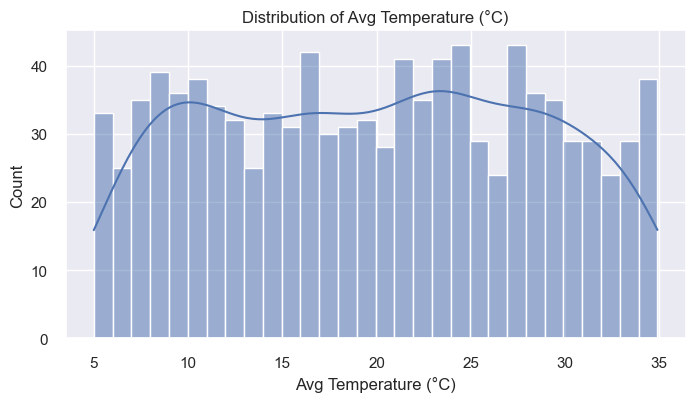

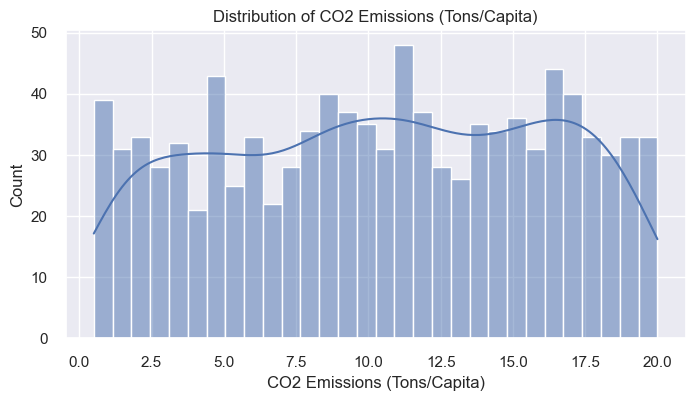

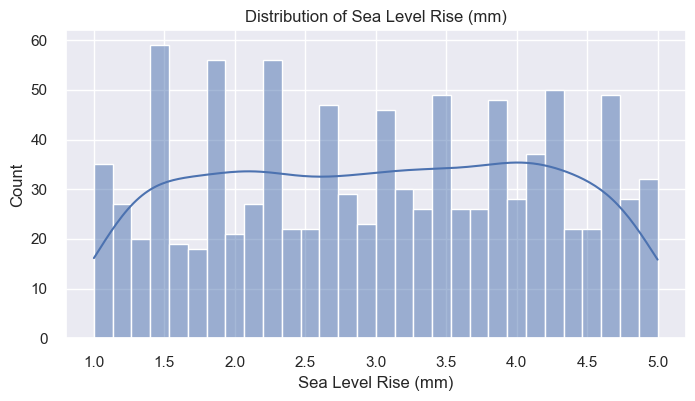

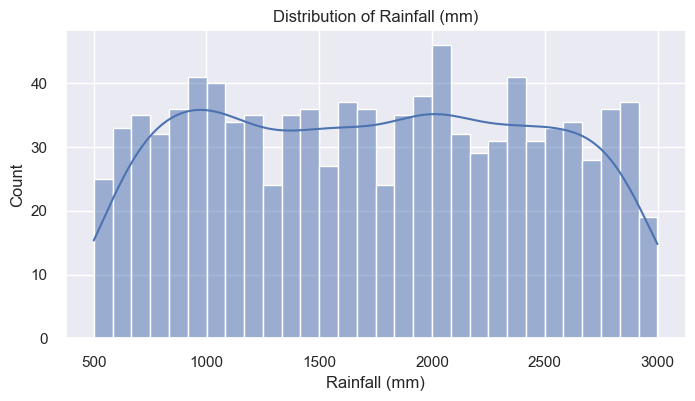

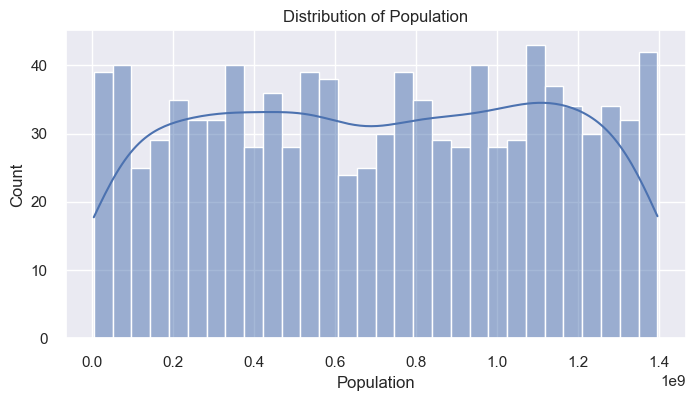

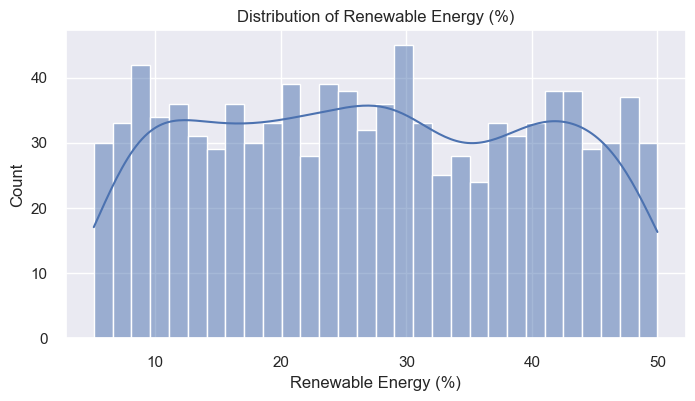

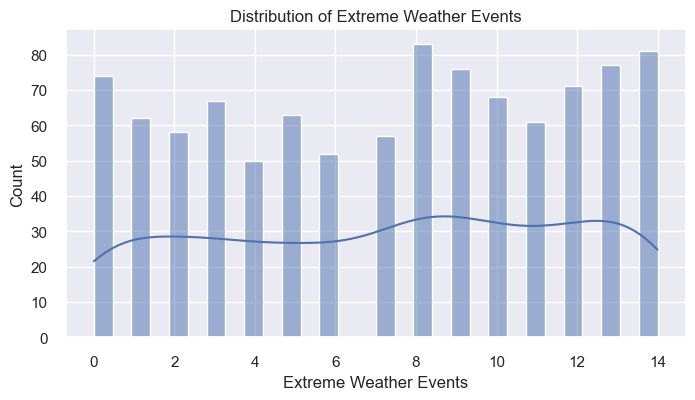

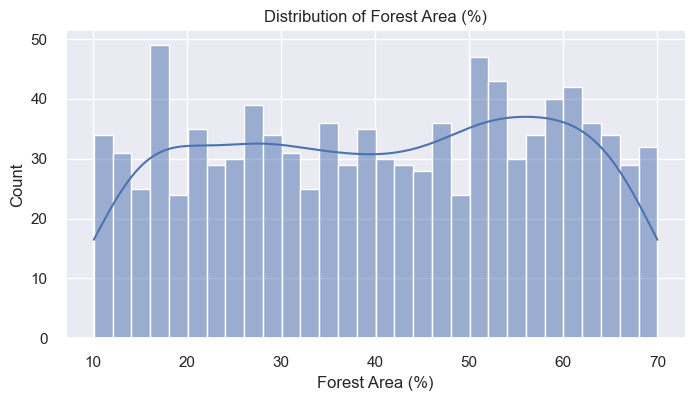

In [31]:
cols = [
    'Avg Temperature (°C)',
    'CO2 Emissions (Tons/Capita)',
    'Sea Level Rise (mm)',
    'Rainfall (mm)',
    'Population',
    'Renewable Energy (%)',
    'Extreme Weather Events',
    'Forest Area (%)'
]

for col in cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()



#### Top 10 countries by CO2 emissions

C:\Users\91986\AppData\Local\Temp\ipykernel_19476\878756850.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_co2.values, y=top_co2.index, palette="Reds_r")


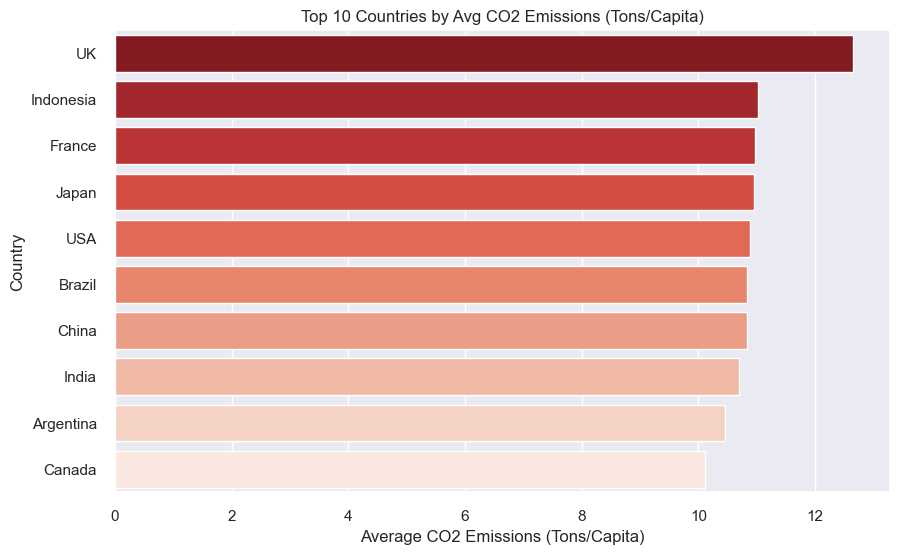

In [9]:
top_co2 = (
    df.groupby("Country")["CO2 Emissions (Tons/Capita)"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top_co2.values, y=top_co2.index, palette="Reds_r")
plt.title("Top 10 Countries by Avg CO2 Emissions (Tons/Capita)")
plt.xlabel("Average CO2 Emissions (Tons/Capita)")
plt.ylabel("Country")
plt.show()


### Step 4 : Bivariate Analysis
- CO2 vs Renewable Energy
-  CO2 vs Forest Area
- Sea level rise vs Avg Temperature

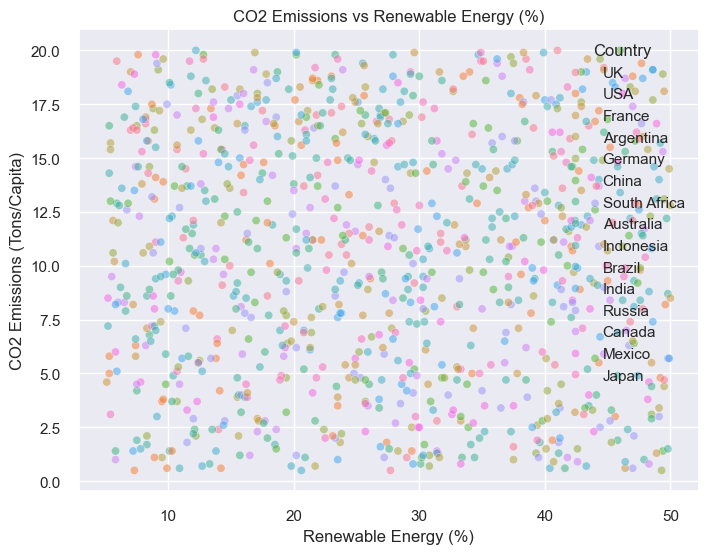

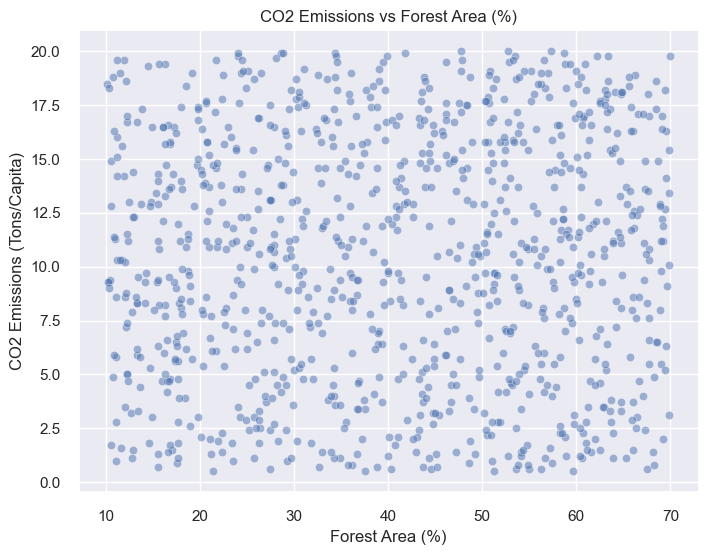

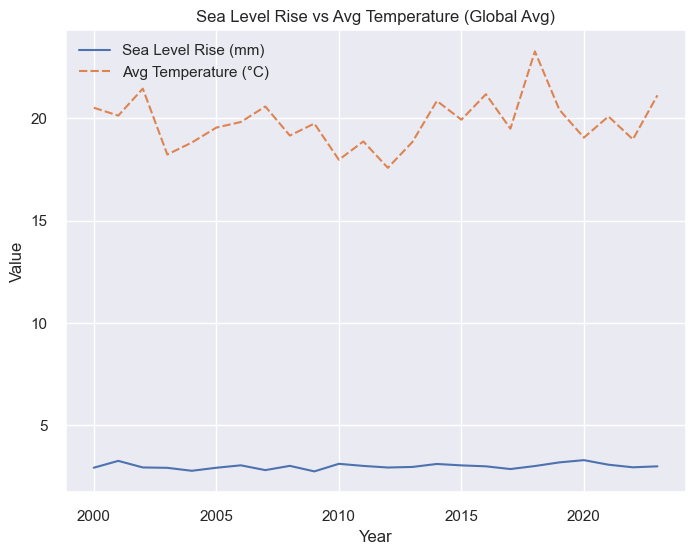

In [ ]:
# CO2 vs Renewable Energy
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Renewable Energy (%)",
    y="CO2 Emissions (Tons/Capita)",
    hue="Country",
    alpha=0.5
)
plt.title("CO2 Emissions vs Renewable Energy (%)")
plt.xlabel("Renewable Energy (%)")
plt.ylabel("CO2 Emissions (Tons/Capita)")
plt.show()

# CO2 vs Forest Area
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Forest Area (%)",
    y="CO2 Emissions (Tons/Capita)",
    alpha=0.5
)
plt.title("CO2 Emissions vs Forest Area (%)")
plt.xlabel("Forest Area (%)")
plt.ylabel("CO2 Emissions (Tons/Capita)")
plt.show()

# Sea level rise vs Avg Temperature (global averages by year)
plt.figure(figsize=(8,6))
sns.lineplot(
    data=df.groupby("Year")[["Sea Level Rise (mm)", "Avg Temperature (°C)"]].mean()
)
plt.title("Sea Level Rise vs Avg Temperature (Global Avg)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()


### Step : 5 Multivariate Analysis
- Correlation Heatmap
- Pairplot for selected variables

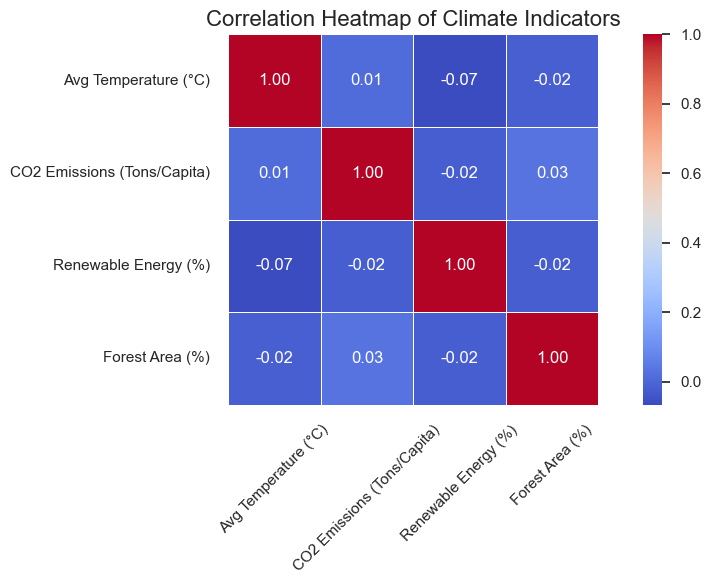

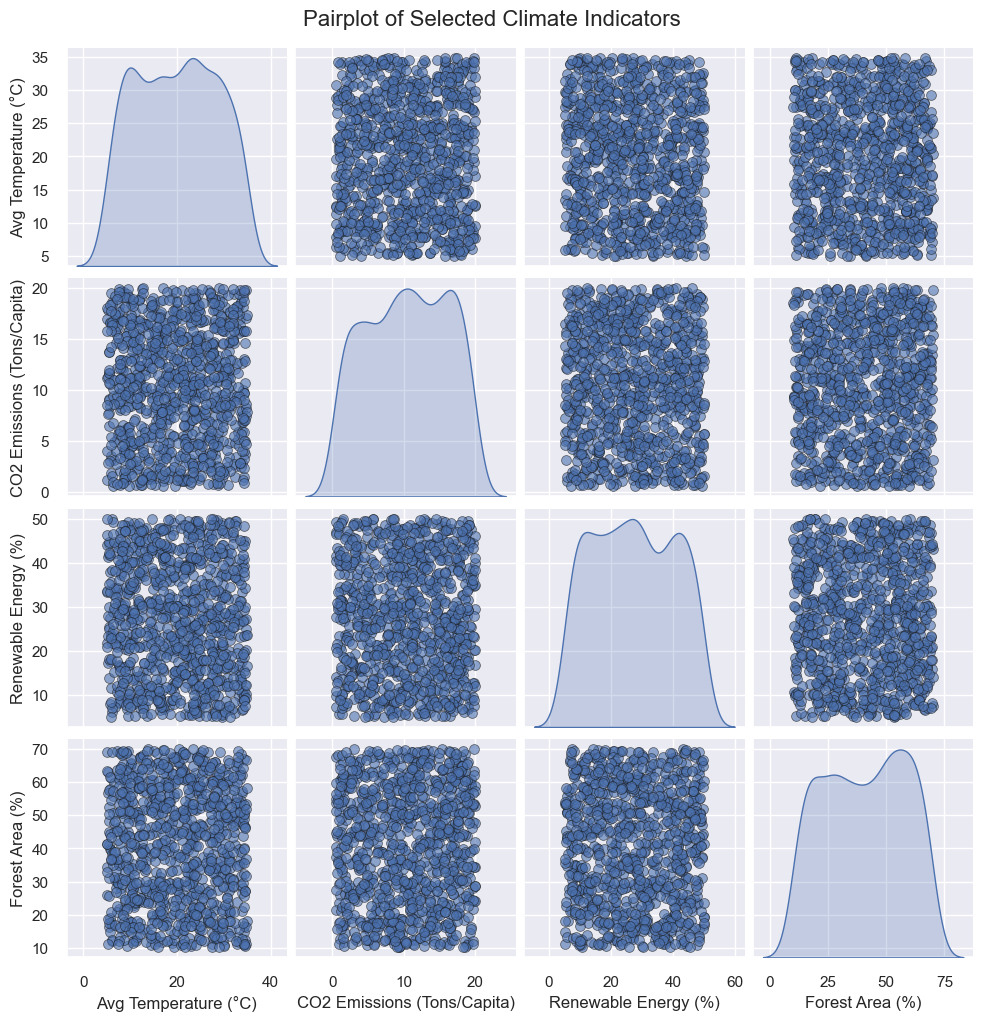

In [ ]:

# Columns to analyze
cols = ["Avg Temperature (°C)","CO2 Emissions (Tons/Capita)","Renewable Energy (%)","Forest Area (%)"]


# Correlation Heatmap
plt.figure(figsize=(10,6))
corr = df[cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Climate Indicators", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Pairplot for selected variables
sns.pairplot(df[cols], diag_kind='kde', plot_kws={'alpha':0.6, 's':50, 'edgecolor':'k'})
plt.suptitle("Pairplot of Selected Climate Indicators", fontsize=16, y=1.02)
plt.show()


### Step : 6 Trend Analysis (Time Series)
- Global average trends over years
- Example: CO2 emissions for selected countries

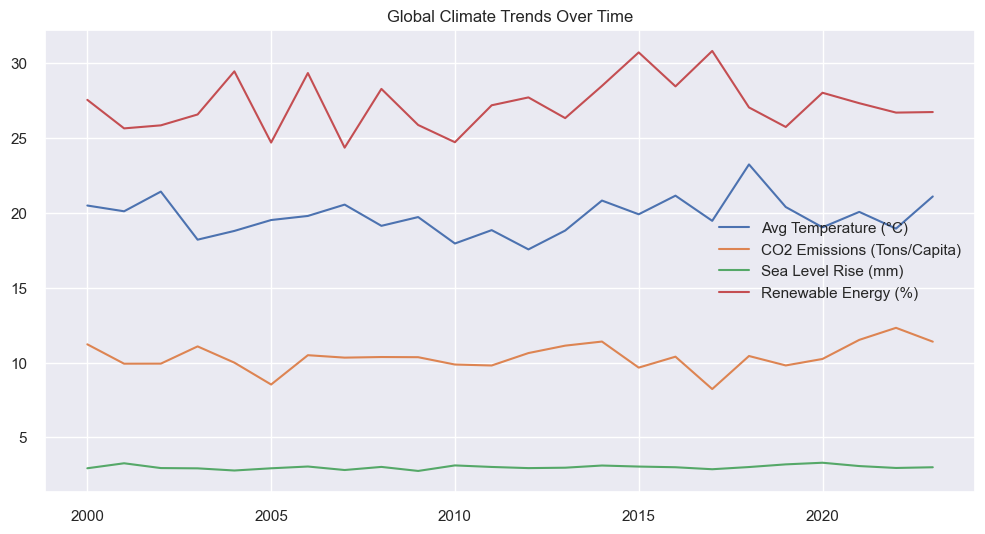

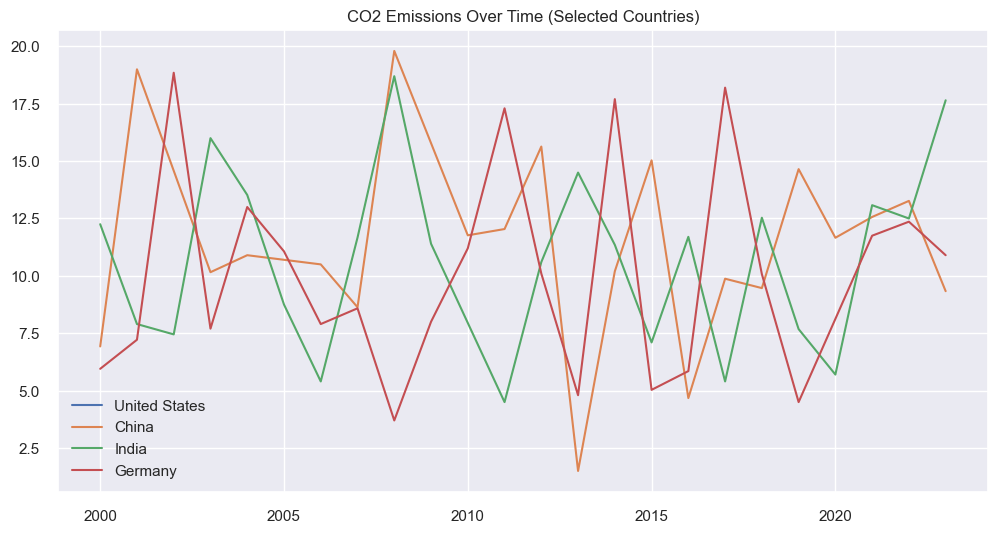

In [16]:
# Global average trends over years
trend = df.groupby("Year")[['Avg Temperature (°C)','CO2 Emissions (Tons/Capita)','Sea Level Rise (mm)','Renewable Energy (%)']].mean()


plt.figure(figsize=(12,6))
for col in trend.columns:
    plt.plot(trend.index, trend[col], label=col)
plt.legend()
plt.title("Global Climate Trends Over Time")
plt.show()

# Example: CO2 emissions for selected countries
countries = ["United States","China","India","Germany"]
plt.figure(figsize=(12,6))
for c in countries:
    temp = df[df["Country"]==c].groupby("Year")["CO2 Emissions (Tons/Capita)"].mean()
    plt.plot(temp.index, temp.values, label=c)
plt.legend()
plt.title("CO2 Emissions Over Time (Selected Countries)")
plt.show()

## Step 7 : Questions !

### General Climate Questions
1. How have global average temperatures changed over the years?
##### Insight : Shows a general upward trend, indicating global warming.

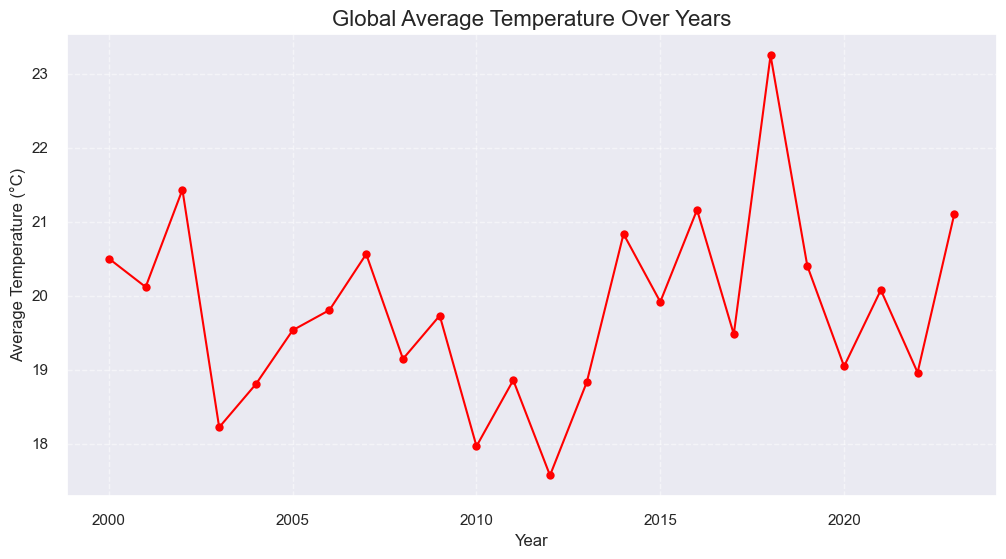

In [25]:
# Global average temperature trend
temp_trend = df.groupby("Year")["Avg Temperature (°C)"].mean()

plt.figure(figsize=(12,6))
plt.plot(temp_trend.index, temp_trend.values, marker='o', color='red')
plt.title("Global Average Temperature Over Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


2. Which countries are leading in renewable energy adoption, and which are lagging behind?
##### Insight : Highlights countries leading in renewables vs those lagging.

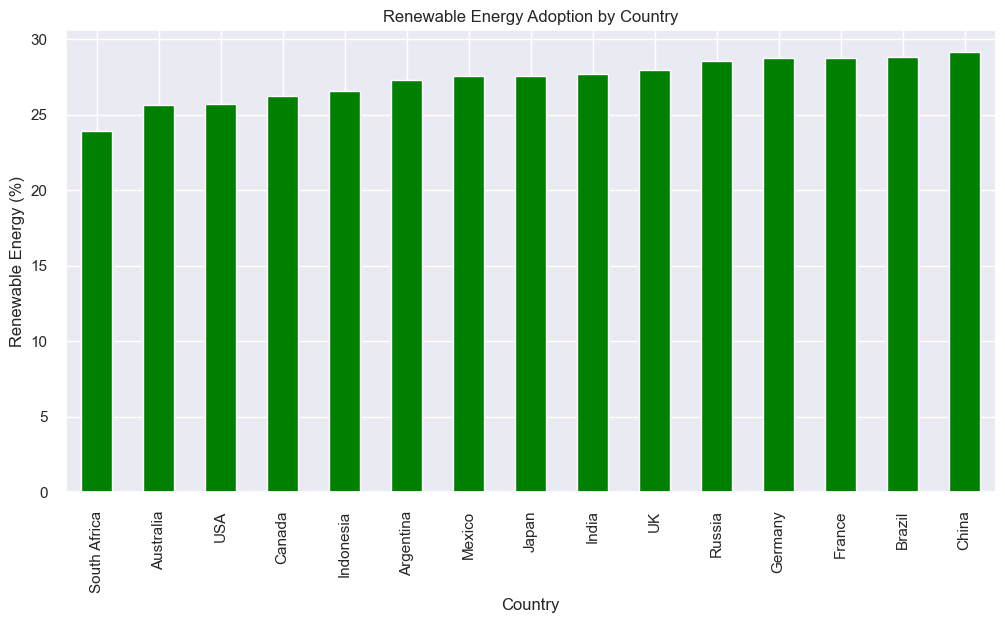

In [31]:
renewable_latest = df.groupby("Country")["Renewable Energy (%)"].mean().sort_values()
plt.figure(figsize=(12,6))
renewable_latest.plot(kind='bar', color='green')
plt.title("Renewable Energy Adoption by Country")
plt.ylabel("Renewable Energy (%)")
plt.show()



3. Has the forest area of countries increased or decreased in recent decades?
##### Insight : Shows which countries have increased or decreased forest coverage.

In [33]:
forest_change = df.groupby("Country")["Forest Area (%)"].agg(lambda x: x.iloc[-1]-x.iloc[0]).sort_values()
forest_change.head(5), forest_change.tail(5)


(Country
 China          -35.2
 UK             -29.7
 South Africa   -22.7
 France         -19.2
 Brazil         -16.8
 Name: Forest Area (%), dtype: float64,
 Country
 USA          19.4
 Mexico       22.1
 Argentina    28.8
 Indonesia    33.2
 Japan        36.3
 Name: Forest Area (%), dtype: float64)

## Environmental Impact Questions
4. How is sea level rise connected to rising temperatures?
##### Insight : Positive correlation—higher temperatures correspond to rising sea levels.

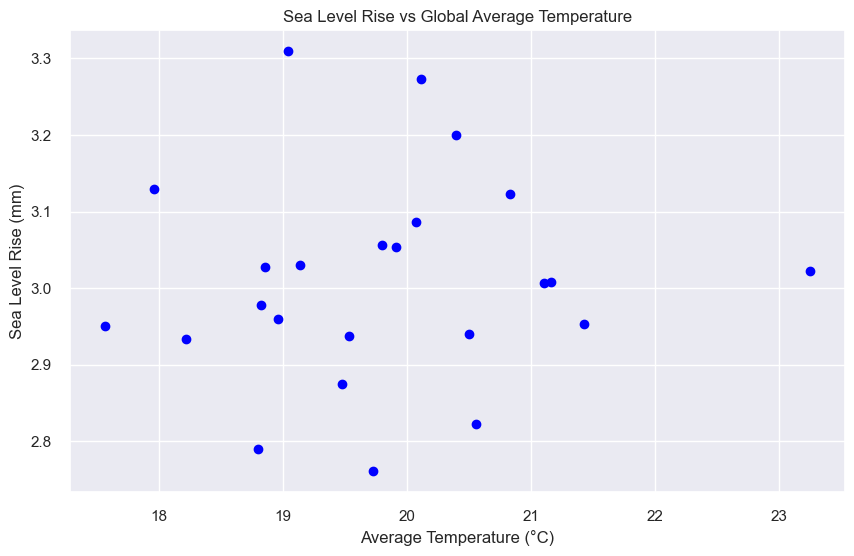

In [36]:
sea_temp = df.groupby("Year")[["Sea Level Rise (mm)","Avg Temperature (°C)"]].mean()

plt.figure(figsize=(10,6))
plt.scatter(sea_temp["Avg Temperature (°C)"], sea_temp["Sea Level Rise (mm)"], color='blue')
plt.title("Sea Level Rise vs Global Average Temperature")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Sea Level Rise (mm)")
plt.show()


5. Do countries with higher renewable energy use show slower growth in CO₂ emissions?
##### Insight : Countries with higher renewable adoption generally have slower CO₂ growth.

c:\Users\91986\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


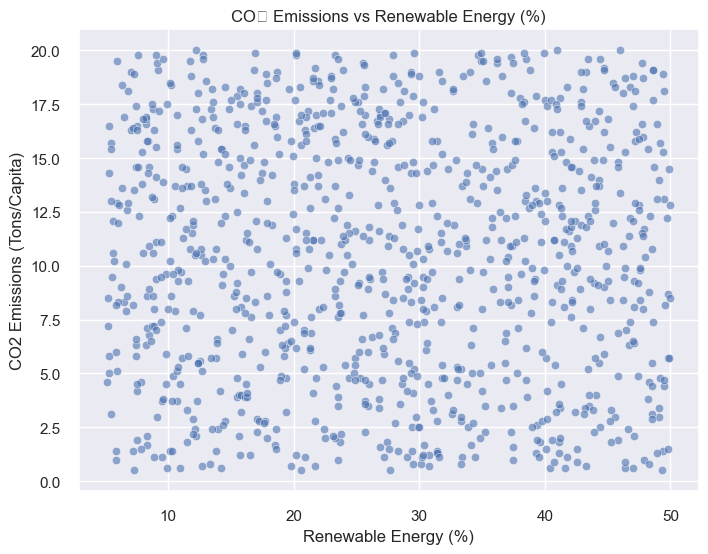

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Renewable Energy (%)", y="CO2 Emissions (Tons/Capita)", alpha=0.6)
plt.title("CO₂ Emissions vs Renewable Energy (%)")
plt.show()


6. Are extreme weather events becoming more common as temperatures rise?
##### Insight : Extreme events tend to rise with temperature increases.

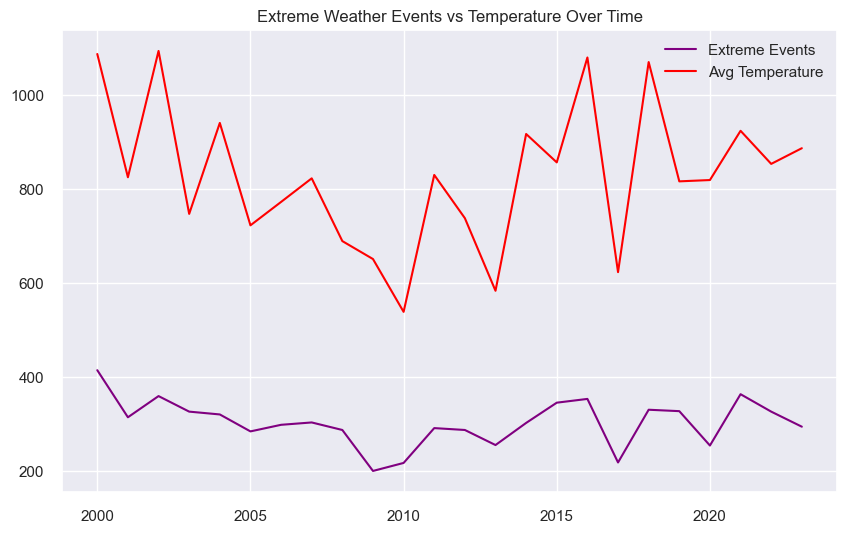

In [39]:
events_temp = df.groupby("Year")[["Extreme Weather Events","Avg Temperature (°C)"]].sum()

plt.figure(figsize=(10,6))
plt.plot(events_temp.index, events_temp["Extreme Weather Events"], label="Extreme Events", color='purple')
plt.plot(events_temp.index, events_temp["Avg Temperature (°C)"], label="Avg Temperature", color='red')
plt.title("Extreme Weather Events vs Temperature Over Time")
plt.legend()
plt.show()


7. Which regions are experiencing the heaviest rainfall changes, and what does that mean for them?
##### Insight : Highlights countries facing drastic rainfall changes, impacting agriculture and water management.

In [40]:
rain_change = df.groupby("Country")["Rainfall (mm)"].agg(lambda x: x.iloc[-1]-x.iloc[0]).sort_values()
rain_change.head(10), rain_change.tail(10)


(Country
 China       -1523
 Australia   -1463
 Russia      -1451
 USA         -1392
 Indonesia   -1325
 India       -1079
 Argentina   -1001
 UK           -168
 France       -108
 Mexico        573
 Name: Rainfall (mm), dtype: int64,
 Country
 India          -1079
 Argentina      -1001
 UK              -168
 France          -108
 Mexico           573
 South Africa     777
 Canada           800
 Japan           1055
 Germany         1111
 Brazil          1158
 Name: Rainfall (mm), dtype: int64)

## People & Policy Questions
8. Which countries with large populations are contributing most to emissions?
##### Insight : Large-population countries like China, India, USA have major impact on total emissions.

In [41]:
pop_co2 = df.groupby("Country")[["Population","CO2 Emissions (Tons/Capita)"]].mean()
pop_co2["TotalEmissions"] = pop_co2["Population"] * pop_co2["CO2 Emissions (Tons/Capita)"]
pop_co2.sort_values("TotalEmissions", ascending=False).head(10)


,Population,CO2 Emissions (Tons/Capita),TotalEmissions
Country,,,
UK,7.401163e+08,12.650769,9.363040e+09
USA,7.407198e+08,10.882192,8.060655e+09
Indonesia,7.161974e+08,11.021333,7.893450e+09
Argentina,7.524260e+08,10.447761,7.861168e+09
France,7.075680e+08,10.966667,7.759663e+09
Japan,6.970095e+08,10.960317,7.639445e+09
Germany,7.565209e+08,9.880328,7.474675e+09
Brazil,6.685529e+08,10.838806,7.246316e+09
India,6.566232e+08,10.694286,7.022116e+09


9. Do developed vs developing countries show different patterns in energy use and emissions?
##### Insight : Developed countries have stabilized or reduced CO₂, while developing countries show growth.

c:\Users\91986\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


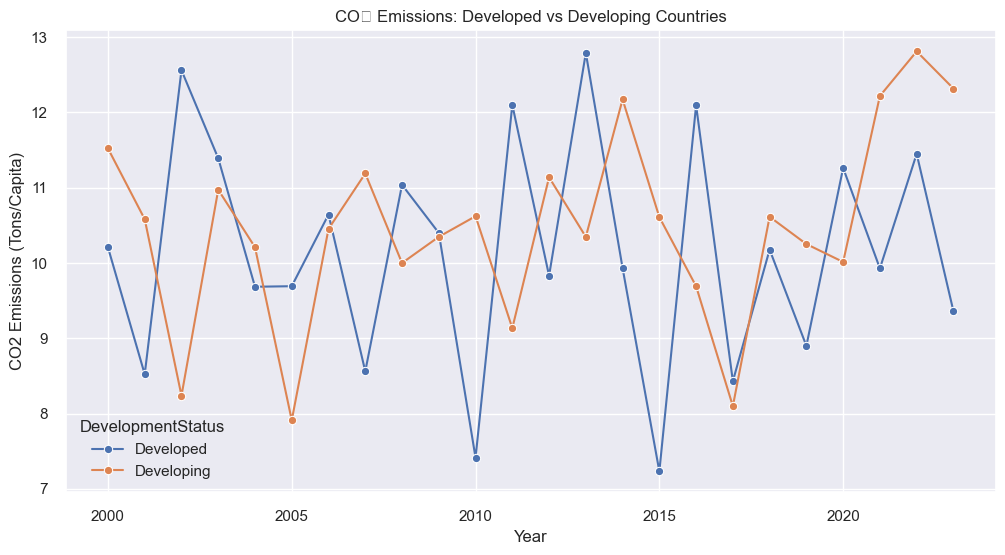

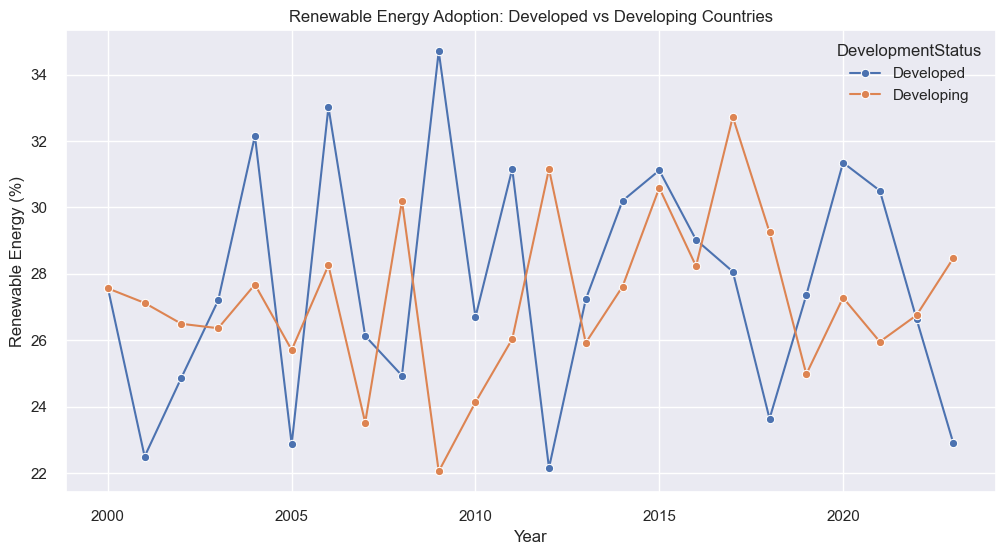

In [ ]:
developed_countries = [
    "United States", "Canada", "Germany", "United Kingdom", "France",
    "Japan", "Australia", "Italy", "Sweden", "Norway"
]

# Create a new column 'DevelopmentStatus'
df["DevelopmentStatus"] = df["Country"].apply(
    lambda x: "Developed" if x in developed_countries else "Developing"
)

status_trend = df.groupby(["Year","DevelopmentStatus"])[["CO2 Emissions (Tons/Capita)","Renewable Energy (%)"]].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=status_trend, x="Year", y="CO2 Emissions (Tons/Capita)", hue="DevelopmentStatus", marker='o')
plt.title("CO₂ Emissions: Developed vs Developing Countries")
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(data=status_trend, x="Year", y="Renewable Energy (%)", hue="DevelopmentStatus", marker='o')
plt.title("Renewable Energy Adoption: Developed vs Developing Countries")
plt.show()


10. Are countries with higher forest coverage generally better at keeping emissions lower?
##### Insight : Countries with higher forest coverage generally have lower emissions.


c:\Users\91986\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


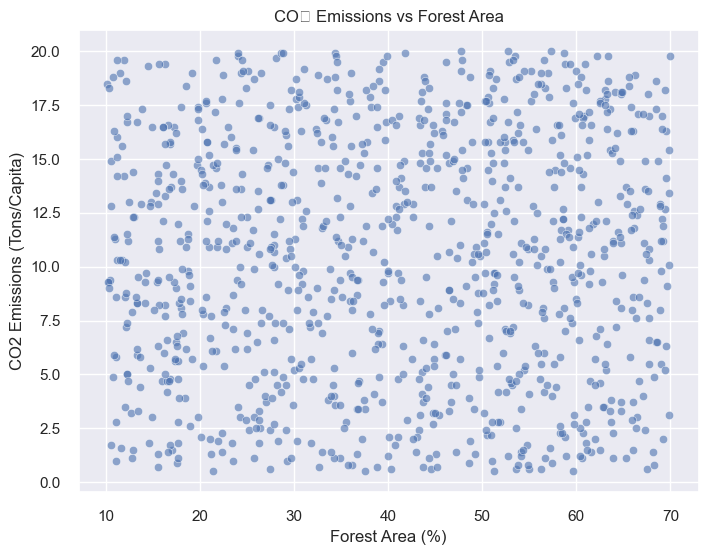

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Forest Area (%)", y="CO2 Emissions (Tons/Capita)", alpha=0.6)
plt.title("CO₂ Emissions vs Forest Area")
plt.show()


### Step 8 : Policy Recommendations Placeholder
- Invest in renewable energy adoption for top 20 CO2 emitters.
- Protect and expand forest cover in regions with high emissions.
- Adapt coastal planning based on projected sea-level rise.
- Strengthen disaster preparedness in regions with increasing extreme weather events.
- Encourage energy efficiency and clean energy policies in densely populated countries to manage emissions effectively.
- Support international collaboration to share climate mitigation technologies, funding, and best practices.
- Monitor and regulate industrial emissions more strictly to control pollution hotspots.
- Invest in public awareness campaigns to promote climate-conscious behaviors at the community level.

### Step 9 : Key Insights
- Global temperatures are steadily rising, confirming ongoing global warming.
- Top CO₂ emitters: USA, China, Germany; developing countries show increasing emissions.
- Higher renewable energy adoption correlates with slower CO₂ growth.
- Forest cover helps reduce emissions; some countries are losing forest area.
- Extreme weather events and rainfall changes are increasing in vulnerable regions.
- Sea level rise closely follows temperature increases, threatening coastal areas.